In [1]:
#Load 'financial_phrasebank' corpus 
from datasets import load_dataset
datasets = load_dataset('financial_phrasebank', 'sentences_66agree')
print(datasets["train"][0])

Reusing dataset financial_phrasebank (/home/jingyang/.cache/huggingface/datasets/financial_phrasebank/sentences_66agree/1.0.0/a6d468761d4e0c8ae215c77367e1092bead39deb08fbf4bffd7c0a6991febbf0)


  0%|          | 0/1 [00:00<?, ?it/s]

{'sentence': 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'label': 1}


In [2]:
#Load corpus into dataframe
import pandas as pd
df = pd.DataFrame.from_dict(datasets["train"])
df

,sentence,label
0,"According to Gran , the company has no plans t...",1
1,Technopolis plans to develop in stages an area...,1
2,With the new production plant the company woul...,2
3,According to the company 's updated strategy f...,2
4,"For the last quarter of 2010 , Componenta 's n...",2
...,...,...
4212,HELSINKI Thomson Financial - Shares in Cargote...,0
4213,LONDON MarketWatch -- Share prices ended lower...,0
4214,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1
4215,Operating profit fell to EUR 35.4 mn from EUR ...,0


In [3]:
#Clean sentences. All punctuation, special characters are removed. All uppercase letters are converted to lowercase.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
import re

table = str.maketrans('', '', string.punctuation)

def clean(sent):
    words = re.split(r'\W+', sent)
    rem_punc = [word.translate(table) for word in words]
    cleaned =  ' '.join([word.lower() for word in rem_punc if word.lower() not in stopwords.words('english')])
    output = re.sub(r'\d+', '', cleaned)
    return output

df['sentence'] = df['sentence'].apply(lambda sent: clean(sent))
df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jingyang/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentence,label
0,according gran company plans move production r...,1
1,technopolis plans develop stages area less s...,1
2,new production plant company would increase ca...,2
3,according company updated strategy years bas...,2
4,last quarter componenta net sales doubled eur...,2


In [4]:
#Prepare VADER
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jingyang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
#Get VADER scores. Obtain labels by rounding polarities
scores = df['sentence'].apply(vader.polarity_scores)
vader_scores = pd.DataFrame.from_records(scores)
vader_scores['labels'] = vader_scores['compound'].round(decimals = 0).apply(lambda x: int(x+1))
vader_scores.head(4)

,neg,neu,pos,compound,labels
0,0.000,0.841,0.159,0.1779,1
1,0.000,1.000,0.000,0.0000,1
2,0.055,0.511,0.434,0.8555,2
3,0.000,0.744,0.256,0.6705,2


In [6]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(df['label'], vader_scores['labels'])
prec = precision_score(df['label'],vader_scores['labels'], average = 'macro')
rec = recall_score(df['label'],vader_scores['labels'], average = 'macro')
f1 = f1_score(df['label'],vader_scores['labels'], average = 'macro')

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1: ", f1)

Accuracy:  0.6182119990514584
Precision:  0.5614962224588468
Recall:  0.41358400310476634
F1:  0.4122608665856327


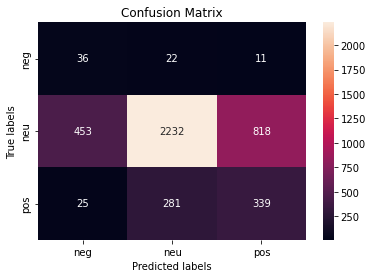

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

matrix = confusion_matrix(vader_scores['labels'],df['label'])

ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);

In [8]:
from textblob import TextBlob

In [9]:
scores = df['sentence'].apply(lambda sent: TextBlob(sent).sentiment[0])
textblob_scores = pd.DataFrame()
textblob_scores['scores'] = scores
#print(textblob_scores)
textblob_scores['labels'] = textblob_scores['scores'].round(decimals = 0).apply(lambda x: int(x+1))
textblob_scores.head(4)

,scores,labels
0,0.000000,1
1,-0.166667,1
2,-0.064802,1
3,-0.016667,1


In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(df['label'],textblob_scores['labels'])
prec = precision_score(df['label'],textblob_scores['labels'], average = 'macro')
rec = recall_score(df['label'],textblob_scores['labels'], average = 'macro')
f1 = f1_score(df['label'],textblob_scores['labels'],average = 'macro')

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1: ", f1)

Accuracy:  0.6127578847521935
Precision:  0.5488119537786221
Recall:  0.35261722502592474
F1:  0.2939315524343075


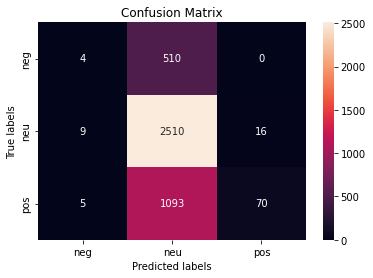

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

matrix = confusion_matrix(df['label'],textblob_scores['labels'])

ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);